In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/MACSS60000/FINAL_DATA/sentiment_score_threshold_100.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,title,selftext,created_utc,score,all_comments,contains_relational_word,reply_count,pandemic_period,comment_body,group,sentiment_probabilities,predicted_rating,normalized_sentiment
0,0,0,Is my degree worth it?,"I know for a fact I want to be a teacher, pref...",2020-04-29 06:16:47,1.0,{'body': 'Welcome to /r/teaching. Please remem...,1.0,3.0,1.0,Welcome to /r/teaching. Please remember the ru...,0.0,"[0.02434772, 0.01911189, 0.05400144, 0.2829052...",5.0,0.727183
1,1,0,Is my degree worth it?,"I know for a fact I want to be a teacher, pref...",2020-04-29 06:16:47,1.0,"{'body': ""It depends on the licensing requirem...",1.0,3.0,1.0,It depends on the licensing requirements for y...,0.0,"[0.03279613, 0.21216513, 0.53603506, 0.1824882...",3.0,-0.011119
2,2,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,"{'body': 'Are you on a curriculum map?', 'scor...",0.0,10.0,0.0,Are you on a curriculum map?,0.0,"[0.18765633, 0.20995575, 0.26447347, 0.1931614...",3.0,-0.051301
3,3,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,{'body': 'I love this question and am interest...,0.0,10.0,0.0,I love this question and am interested in what...,0.0,"[0.00962509, 0.03723098, 0.11756698, 0.5209406...",4.0,0.546866
4,4,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,"{'body': ""So what they taught us in our progra...",0.0,10.0,0.0,So what they taught us in our program is that ...,0.0,"[0.03146419, 0.16652903, 0.48224553, 0.2634071...",3.0,0.073329


In [ ]:
df.shape

(1304575, 15)

In [ ]:
df = df.drop_duplicates(subset="comment_body", keep="first")

In [ ]:
df.shape

(1245728, 15)

In [ ]:
pip install tqdm

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.util import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from tqdm import tqdm

nltk.download('punkt')
nltk.download('stopwords')


def count_bigrams_filtered(df):
    # Convert text to string
    df['comment_body'] = df['comment_body'].astype(str)
    # Load English stop words
    stop_words = set(stopwords.words('english'))
    # Initialize a progress bar
    pbar = tqdm(total=df.shape[0], desc="Processing")
    tokenized_texts = []
    for text in df['comment_body']:
        # Tokenize and filter out stop words and non-alphabetical tokens
        tokens = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]
        tokenized_texts.append(tokens)
        pbar.update(1)
    pbar.close()
    # Generate and flatten bigrams
    bigrams_list = [list(bigrams(tokens)) for tokens in tokenized_texts]
    bigrams_flattened = [bigram for sublist in bigrams_list for bigram in sublist]
    # Count occurrences
    bigram_counts = Counter(bigrams_flattened)
    return bigram_counts

# Split the DataFrame by 'group' and then by 'pandemic_period'
df_group_0_pre_pandemic = df[(df['group'] == 0) & (df['pandemic_period'] == 0)]
df_group_0_during_pandemic = df[(df['group'] == 0) & (df['pandemic_period'] == 1)]
df_group_1_pre_pandemic = df[(df['group'] == 1) & (df['pandemic_period'] == 0)]
df_group_1_during_pandemic = df[(df['group'] == 1) & (df['pandemic_period'] == 1)]

# Count bigrams in each subset with progress display
bigram_counts_0_pre = count_bigrams_filtered(df_group_0_pre_pandemic)
bigram_counts_0_during = count_bigrams_filtered(df_group_0_during_pandemic)
bigram_counts_1_pre = count_bigrams_filtered(df_group_1_pre_pandemic)
bigram_counts_1_during = count_bigrams_filtered(df_group_1_during_pandemic)

# Extract the top 100 bigrams for each subset
top_100_bigrams_0_pre = bigram_counts_0_pre.most_common(100)
top_100_bigrams_0_during = bigram_counts_0_during.most_common(100)
top_100_bigrams_1_pre = bigram_counts_1_pre.most_common(100)
top_100_bigrams_1_during = bigram_counts_1_during.most_common(100)

# Convert to DataFrame
top_100_bigrams_df_0_pre = pd.DataFrame(top_100_bigrams_0_pre, columns=['Bigram', 'Count'])
top_100_bigrams_df_0_during = pd.DataFrame(top_100_bigrams_0_during, columns=['Bigram', 'Count'])
top_100_bigrams_df_1_pre = pd.DataFrame(top_100_bigrams_1_pre, columns=['Bigram', 'Count'])
top_100_bigrams_df_1_during = pd.DataFrame(top_100_bigrams_1_during, columns=['Bigram', 'Count'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-10-cf6a17c2d9c3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_body'] = df['comment_body'].astype(str)
Processing: 100%|██████████| 189571/189571 [02:08<00:00, 1473.93it/s]


In [ ]:
top_100_bigrams_0_pre = bigram_counts_0_pre.most_common(150)
top_100_bigrams_df_0_pre = pd.DataFrame(top_100_bigrams_0_pre, columns=['Bigram', 'Count'])

In [ ]:
idx = [1, 2, 3, 4, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 22, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 45, 47, 48, 49]
idx1 = [50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72 ,73, 74, 75, 76, 77, 81, 82, 83, 84, 85, 86, 87, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100]
idx3 = [101, 104, 106, 107, 108, 111, 123, 129, 130, 131, 137, 145, 146, 147, 148, 149]
idx4 = idx + idx1 + idx3
top_100_bigrams_df_0_pre = top_100_bigrams_df_0_pre.drop(idx4)
top_100_bigrams_df_0_pre.shape

(59, 2)

In [ ]:
top_100_bigrams_0_during = bigram_counts_0_during.most_common(150)
top_100_bigrams_df_0_during = pd.DataFrame(top_100_bigrams_0_during, columns=['Bigram', 'Count'])

In [ ]:
idx = [0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37, 40, 42, 43, 45, 47, 48, 49]
idx1 = [51, 52, 53, 55, 56, 58, 61, 60, 62, 72, 74, 75, 76, 77, 78, 81, 84, 86, 87, 90, 91, 92, 93, 94]
idx2 = [112, 113, 132, 134, 131, 142, 143, 145, 144, 146, 147, 148, 149]
# top_100_bigrams_df_0_during = top_100_bigrams_df_0_during.drop(idx2)
top_100_bigrams_df_0_during[:50]

,Bigram,Count
6,"(good, luck)",6022
8,"(high, school)",5538
13,"(go, back)",4251
21,"(mental, health)",3275
23,"(let, know)",3040
28,"(come, back)",2834
35,"(take, care)",2566
38,"(let, go)",2536
39,"(social, media)",2529
41,"(get, better)",2432


In [ ]:
idx = [0, 3, 9, 10, 11, 14, 15, 17, 18, 19, 22, 23, 24, 25, 26, 50, 51, 54, 55, 58, 60, 62, 63, 67, 68, 27, 28, 30, 33, 37, 39, 41, 42, 43, 44, 45, 40]
# top_100_bigrams_df_1_pre = top_100_bigrams_df_1_pre.drop(idx)
top_100_bigrams_df_1_pre[:50]

,Bigram,Count
1,"(social, anxiety)",2781
2,"(mental, health)",2289
4,"(get, better)",1953
5,"(good, luck)",1888
6,"(mental, illness)",1265
7,"(feel, better)",1194
8,"(feel, way)",1146
12,"(panic, attacks)",938
13,"(panic, attack)",896
16,"(high, school)",894


In [ ]:
idx = [0, 3, 7, 10, 11, 13, 14, 15, 16, 17, 18, 22, 23, 24, 25, 26, 27, 30, 33, 34, 35, 37, 38, 41, 44, 46, 49, 51, 51, 54, 61, 66, 67, 68, 84, 85, 86, 99]
# top_100_bigrams_df_1_during = top_100_bigrams_df_1_during.drop(idx)
top_100_bigrams_df_1_during[:50]

,Bigram,Count
1,"(social, anxiety)",7332
2,"(mental, health)",6857
4,"(get, better)",4478
5,"(mental, illness)",3671
6,"(good, luck)",3492
8,"(feel, better)",3155
9,"(feel, way)",2690
12,"(panic, attacks)",2315
19,"(get, help)",2047
20,"(panic, attack)",2036


In [ ]:
bigrams_1_pre_set = set(top_100_bigrams_df_1_pre['Bigram'])
bigrams_1_during_set = set(top_100_bigrams_df_1_during['Bigram'])
unique_bigrams_1_pre = bigrams_1_pre_set.difference(bigrams_1_during_set)
print(unique_bigrams_1_pre)

{('say', 'something'), ('know', 'feel'), ('suicidal', 'thoughts'), ('lot', 'people'), ('every', 'single'), ('need', 'talk'), ('anyone', 'else'), ('around', 'people'), ('really', 'want'), ('eye', 'contact'), ('make', 'friends'), ('next', 'time'), ('many', 'people'), ('feeling', 'like'), ('help', 'get')}


In [ ]:
unique_bigrams_1_during = bigrams_1_during_set.difference(bigrams_1_pre_set)
print(unique_bigrams_1_during)

{('health', 'issues'), ('hope', 'get'), ('people', 'around'), ('someone', 'else'), ('go', 'back'), ('hope', 'find'), ('anxiety', 'disorder'), ('intrusive', 'thoughts'), ('mental', 'illnesses'), ('people', 'say'), ('sorry', 'going'), ('everyone', 'else'), ('wish', 'could'), ('people', 'know'), ('let', 'go')}


In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(bigrams_df, title):
    # Convert bigrams and counts into a dictionary
    bigram_dict = {(' '.join(bigram)): count for bigram, count in bigrams_df[['Bigram', 'Count']].values}
    # Create a word cloud object
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10).generate_from_frequencies(bigram_dict)
    # Plot the word cloud
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad = 0)
    plt.show()

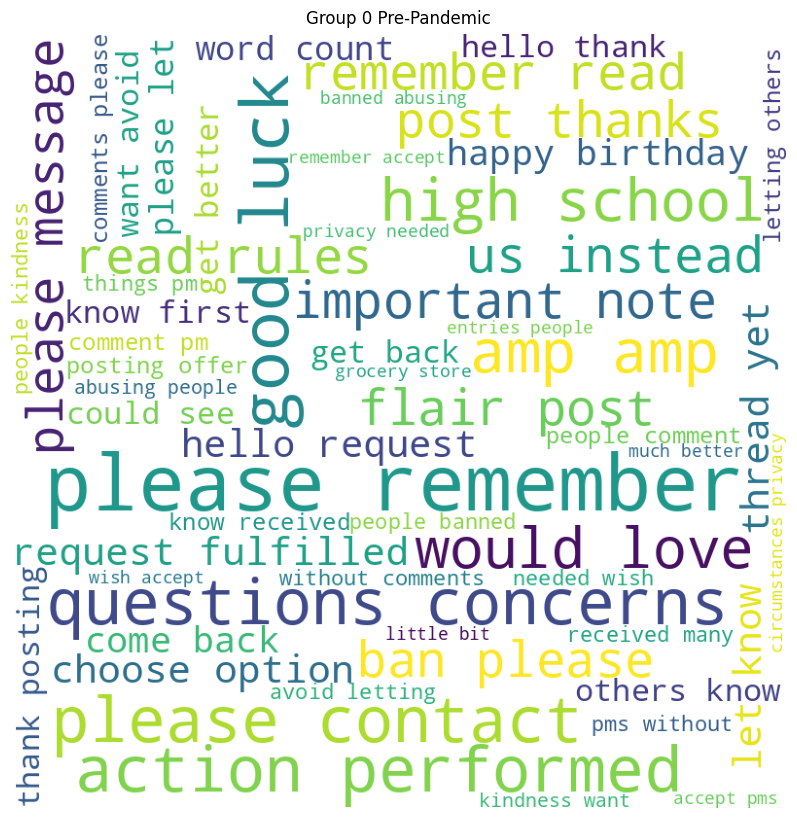

In [ ]:
generate_word_cloud(top_100_bigrams_df_0_pre, 'Group 0 Pre-Pandemic')

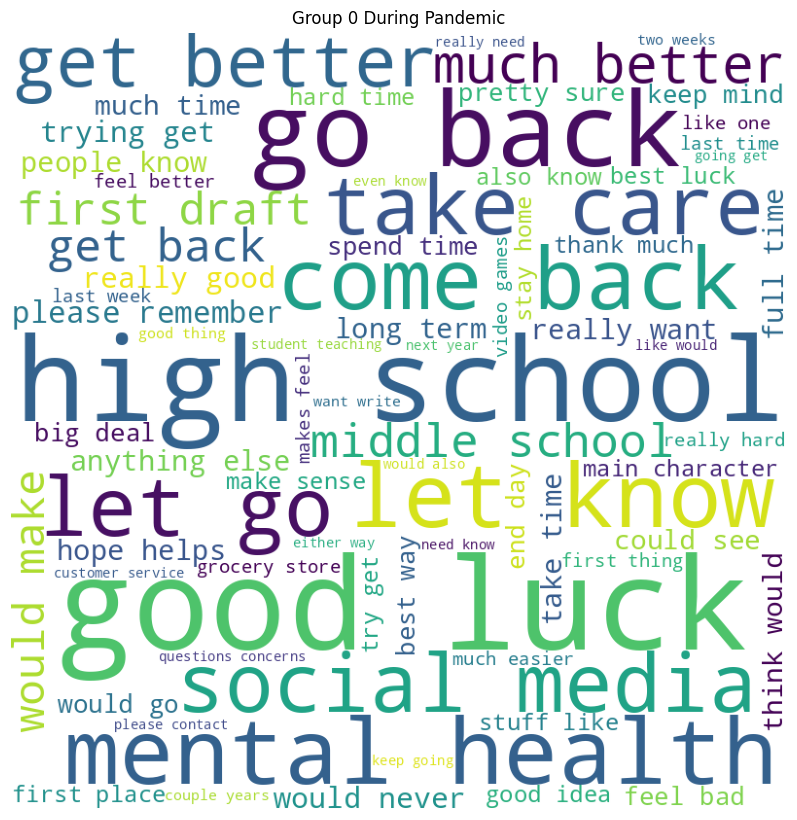

In [ ]:
generate_word_cloud(top_100_bigrams_df_0_during, 'Group 0 During Pandemic')

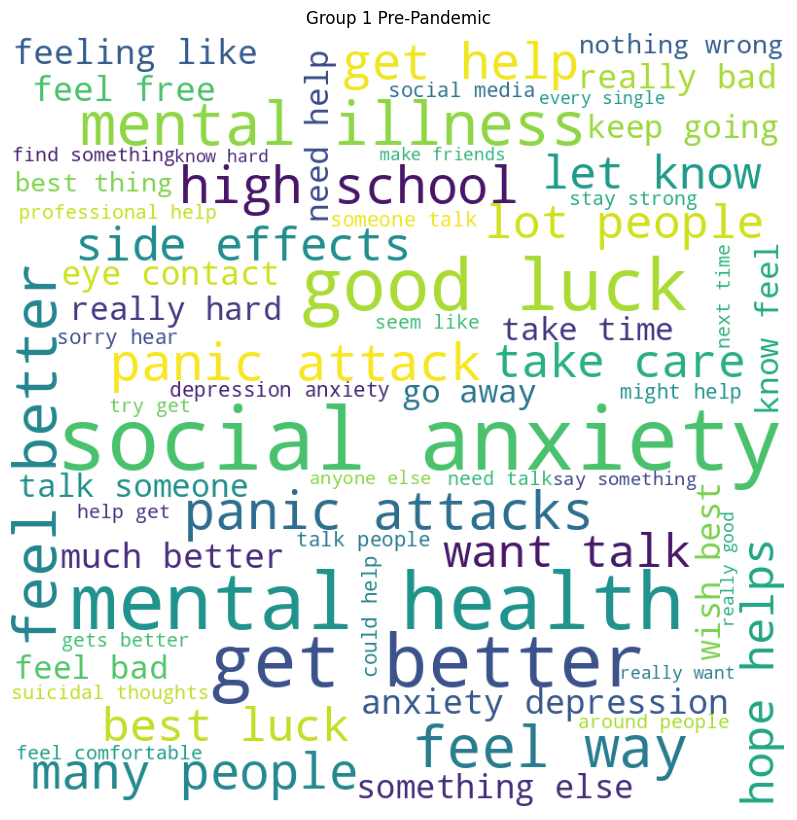

In [ ]:
generate_word_cloud(top_100_bigrams_df_1_pre, 'Group 1 Pre-Pandemic')

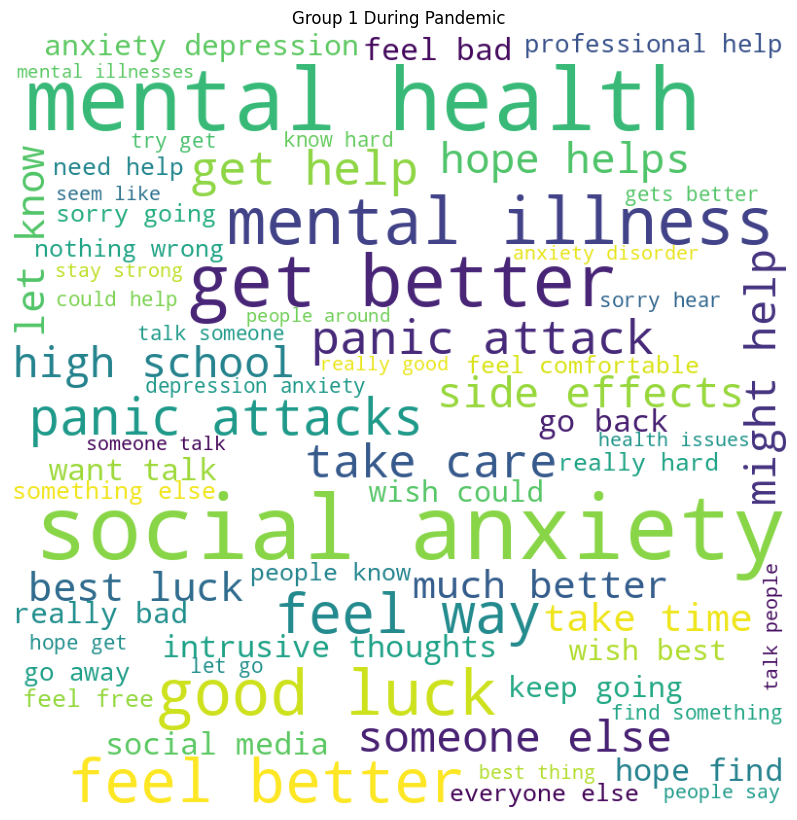

In [ ]:
generate_word_cloud(top_100_bigrams_df_1_during, 'Group 1 During Pandemic')